# Assignment 2: Statistical Modeling

## Project 1: Wind Power Forecast

### Introduction
In this project you will analyze a dataset from Tunø Knob wind power plant. Wind power is the response variable, with wind speed and wind direction as explanatory variables.

### Regression Models 

#### Load Data and transformation done in Assigment 1 for wind speed and wind Power.

(1) Wind-Power <- Box-cox.transformation()

(2) Wind-Speed <- log.transformation()

,r.day,month,day,pow.obs,ws30,wd30,wd_rad,wd_sin,wd_cos
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,0.04860556,6.723611,4.0343405,0.070412524,0.07035436,0.9975221
2,2,1,2,0.55600274,4.272603,2.1365208,0.037289323,0.03728068,0.9993048
3,3,1,3,0.42372329,4.272603,1.6240318,0.028344702,0.02834091,0.9995983
4,4,1,4,0.33217534,6.541096,0.2269022,0.003960191,0.00396018,0.9999922
5,5,1,5,0.37455890,9.713699,5.3161852,0.092784935,0.09265186,0.9956986
6,6,1,6,0.64245205,8.161644,0.9522963,0.016620706,0.01661994,0.9998619


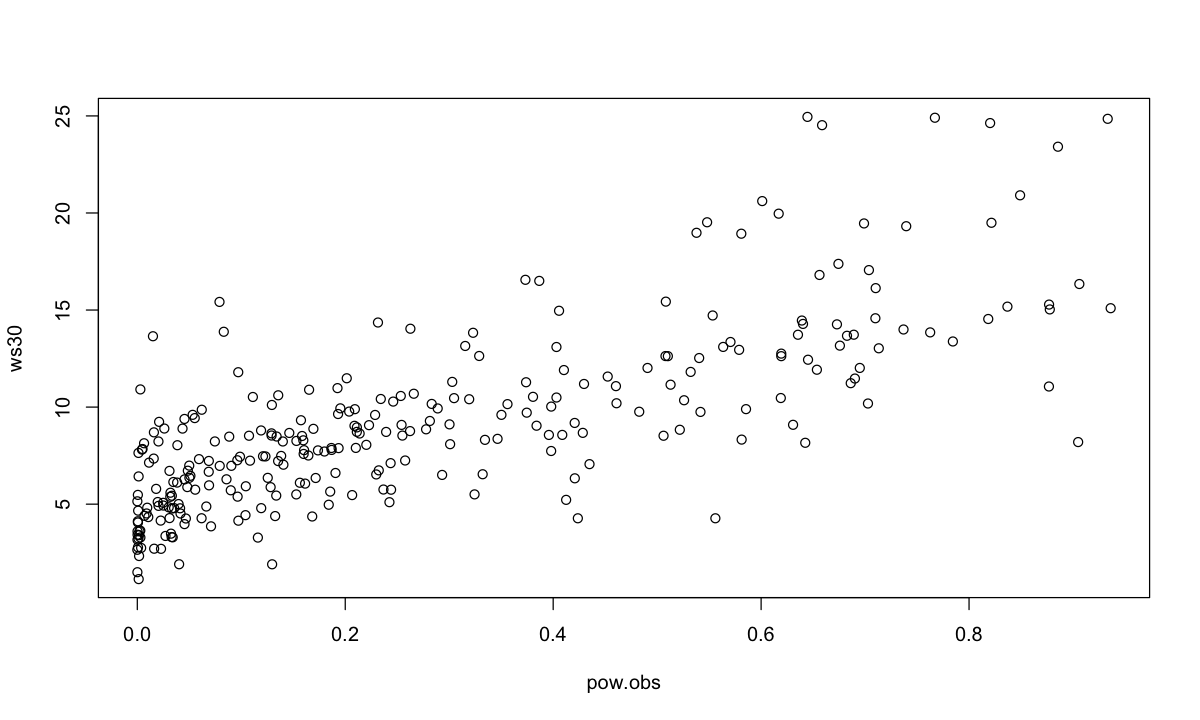

In [182]:
# Task 1.1: Formulate Initial Model
df_tuno <- read.table("tuno.txt", header = TRUE)
df_tuno$pow.obs <- df_tuno$pow.obs / 5000
# Transformation for wind power
box_cox_trans <- function(lambda, y){
  (1 / lambda) * log((y^lambda) / (1 - y^lambda))
}

### Transformation of Wind direction
# 1. Convert degrees to radians
df_tuno$wd_rad <- df_tuno$wd * (pi / 180)

# 2. Calculate the sine component
# This captures the North-South variation (with a cycle every 360 degrees)
df_tuno$wd_sin <- sin(df_tuno$wd_rad)

# 3. Calculate the cosine component
# This captures the East-West variation (with a cycle every 360 degrees)
df_tuno$wd_cos <- cos(df_tuno$wd_rad)


# Defining variables for simplification
pow.obs <- df_tuno$pow.obs
ws30 <- df_tuno$ws30
wd_sin <- df_tuno$wd_sin
wd_cos <- df_tuno$wd_cos 
wd_rad <- df_tuno$wd_rad

# Power transformation from assigment 1
lambda.eq1 <- 0.326
boxpow <- box_cox_trans(lambda.eq1, pow.obs)

# Log transformation for wind speed
logws <- log(ws30)
par(bg = "white")
plot(pow.obs, ws30)
head(df_tuno)

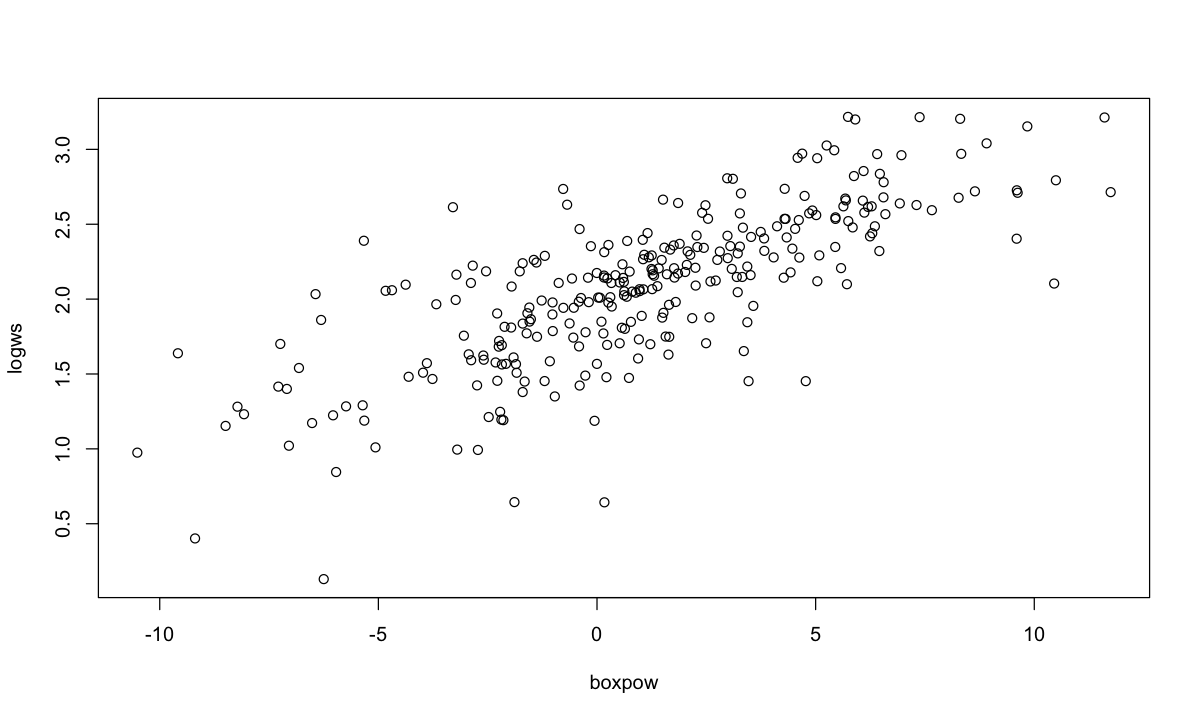

In [183]:
par(bg = "white")
plot(boxpow, logws)

### Base model


Call:
lm(formula = pow.obs ~ ws30 + I(ws30^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.47630 -0.10464 -0.02010  0.09463  0.65792 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.1857444  0.0399230  -4.653 5.03e-06 ***
ws30         0.0581438  0.0074991   7.753 1.59e-13 ***
I(ws30^2)   -0.0006536  0.0003086  -2.118    0.035 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1648 on 285 degrees of freedom
Multiple R-squared:  0.5894,	Adjusted R-squared:  0.5866 
F-statistic: 204.6 on 2 and 285 DF,  p-value: < 2.2e-16


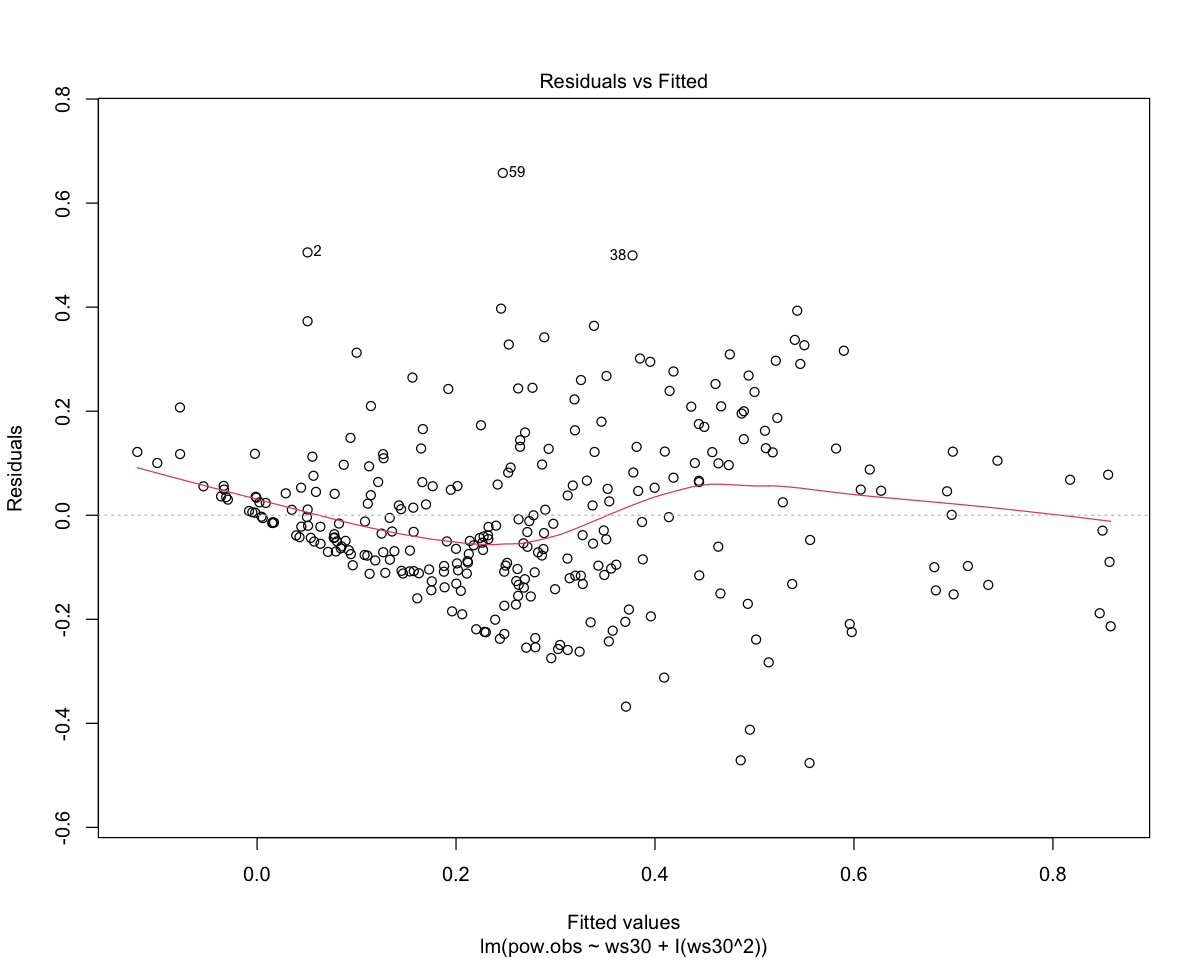

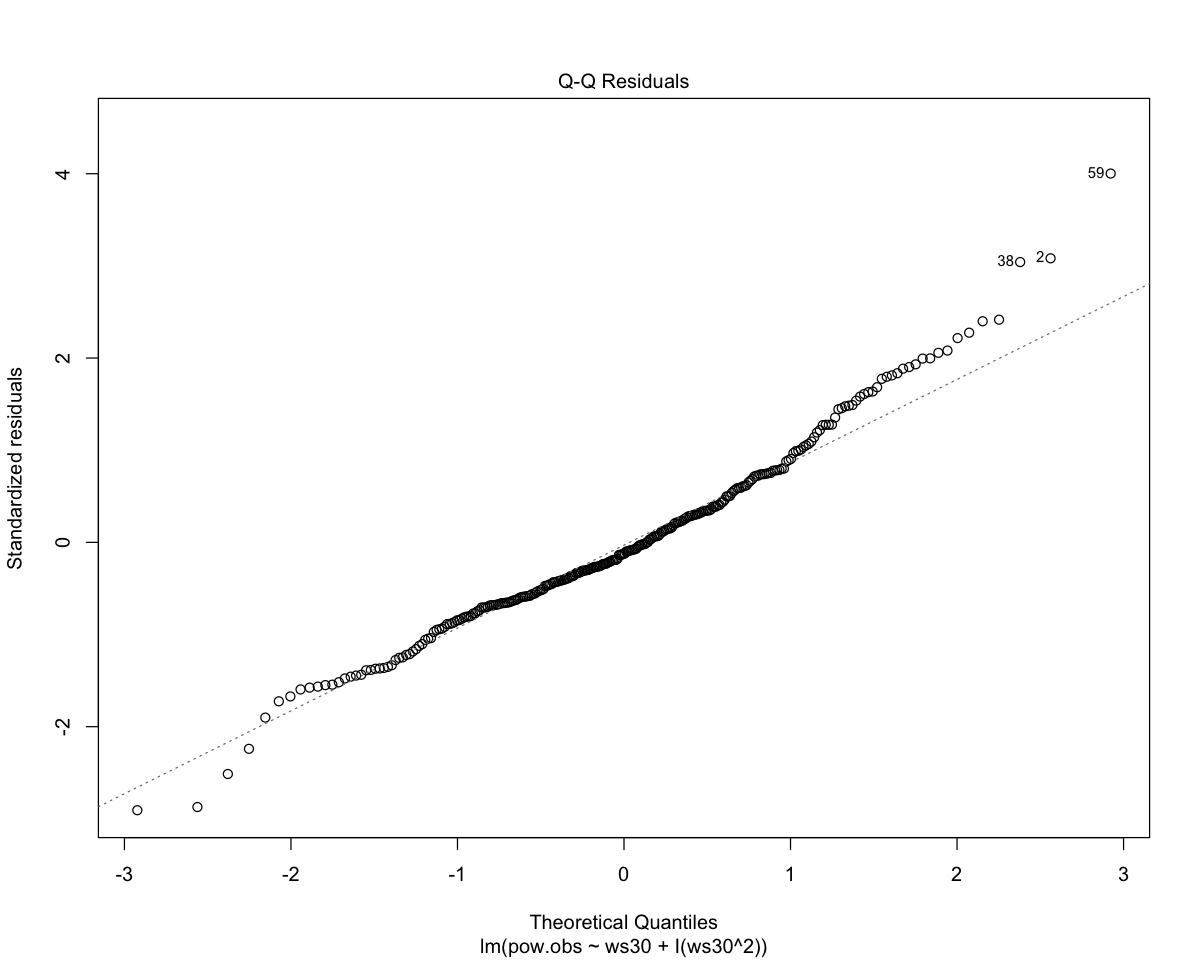

In [184]:
# Base model: pow.obs ~ ws30 + ws30^2
par(bg = "white")
basemodel <- lm(pow.obs ~ ws30 + I(ws30^2))
width <- 10
height <- 8
par(bg = "white")
options(repr.plot.width = width, repr.plot.height = height)
summary(basemodel)
plot(basemodel, which = 1)
plot(basemodel, which = 2)


#### Question 1.2
You might consider non-normal models and/or normal model with data transformation. Further you might consider including wind direction. You should develop a suited model for prediction of daily power production.



Call:
lm(formula = boxpow ~ logws + I(logws^2))

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1295 -1.2918  0.0097  1.5459  9.4840 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -7.4715     1.4869  -5.025 8.91e-07 ***
logws         1.9162     1.5008   1.277  0.20272    
I(logws^2)    0.9964     0.3735   2.667  0.00808 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.605 on 285 degrees of freedom
Multiple R-squared:  0.5809,	Adjusted R-squared:  0.5779 
F-statistic: 197.5 on 2 and 285 DF,  p-value: < 2.2e-16



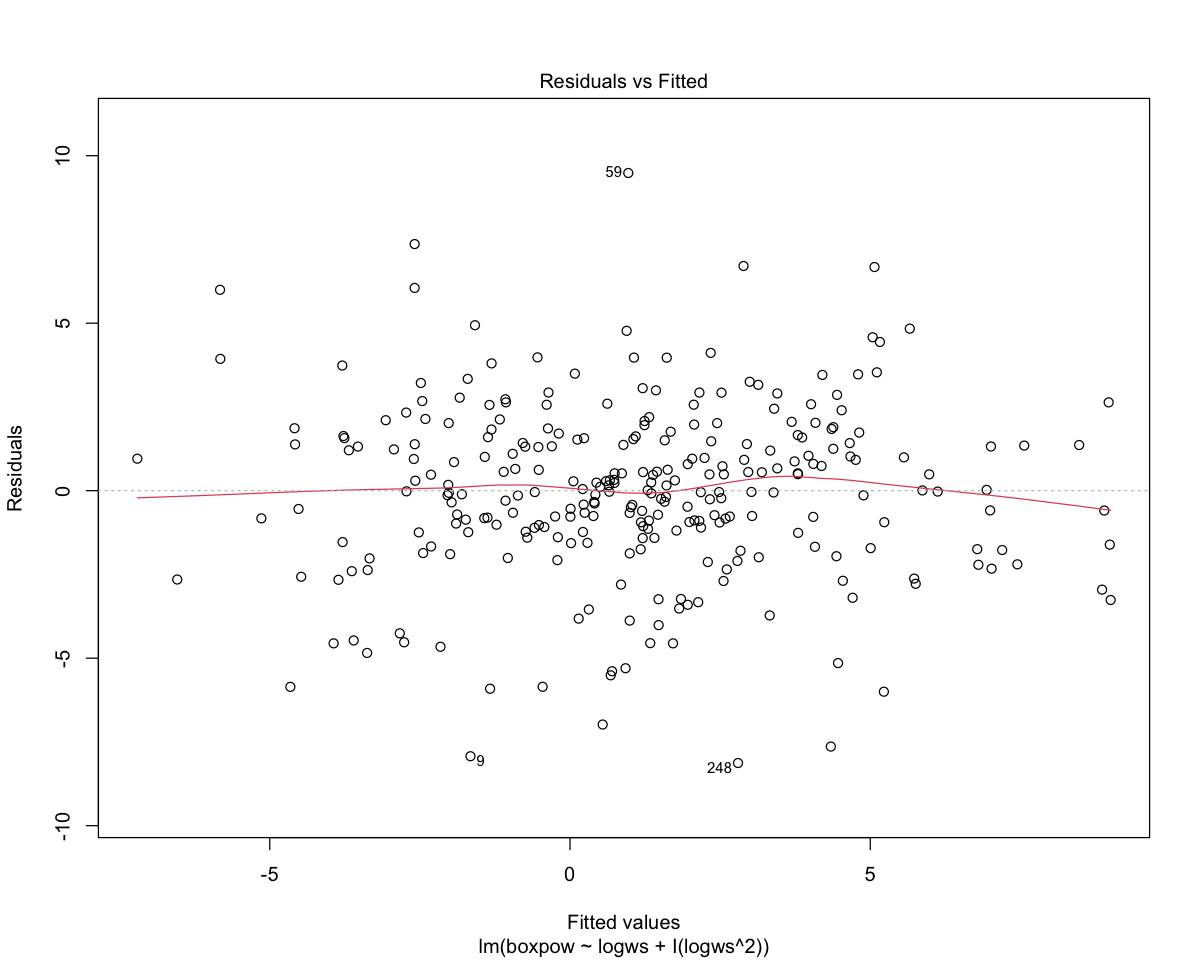

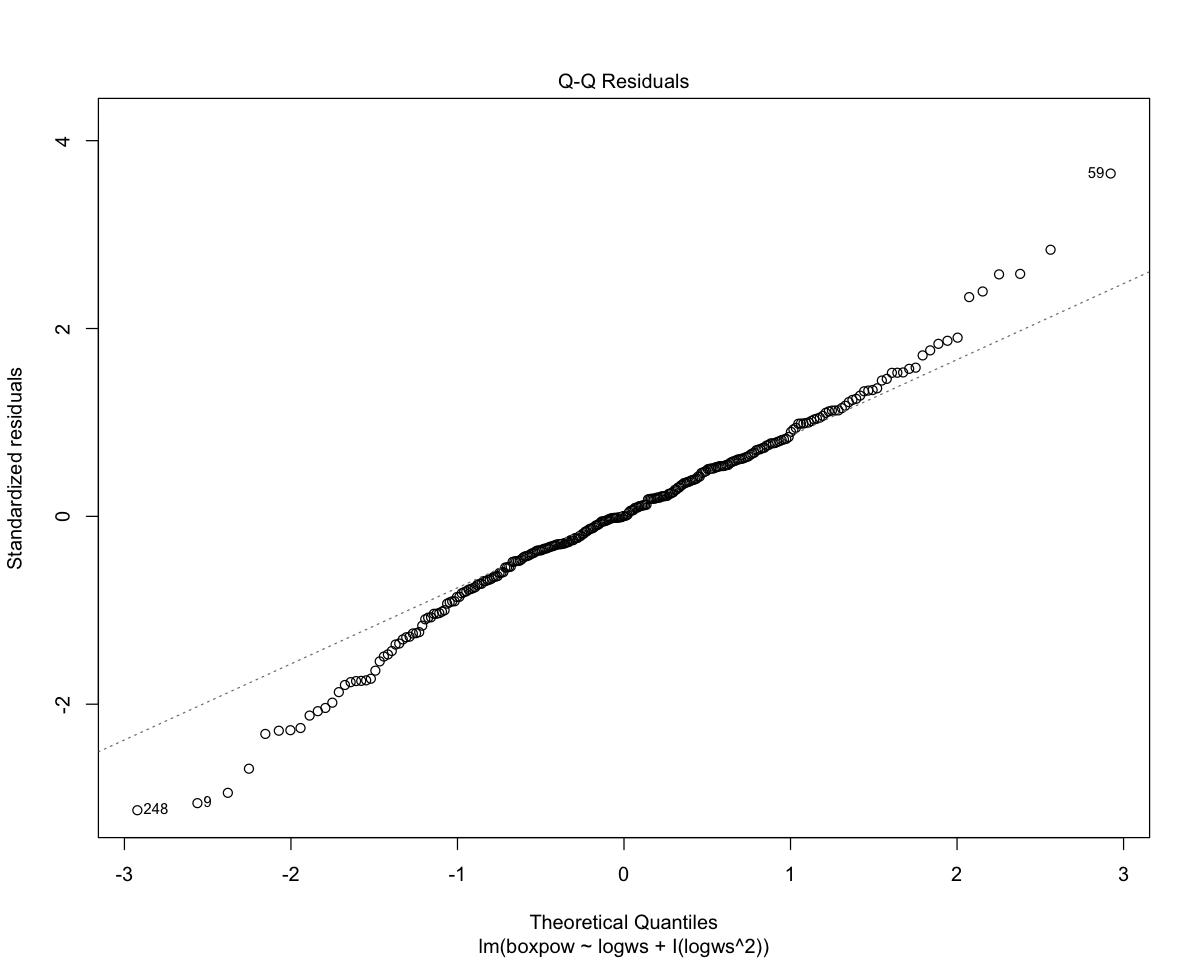

In [185]:
# Task 1.2: Model Development with Transformations
plot_model <- function(model) {
  width <- 10
  height <- 8
  par(bg = "white")
  options(repr.plot.width = width, repr.plot.height = height)
  print(summary(model))
  plot(model, which = 1)
  plot(model, which = 2)
}

# Transformed model: boxpow ~ logws + logws^2
Box_cox_model <- lm(boxpow ~ logws + I(logws^2))
plot_model(Box_cox_model)


Call:
lm(formula = boxpow ~ logws + I(logws^2) + wd_sin + wd_cos)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.4433 -1.3895  0.0869  1.5588  8.9715 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -1115.4424   356.5791  -3.128  0.00194 **
logws           1.7470     1.4860   1.176  0.24072   
I(logws^2)      1.0189     0.3713   2.744  0.00645 **
wd_sin         61.8733    20.1622   3.069  0.00236 **
wd_cos       1107.0224   356.2995   3.107  0.00208 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.57 on 283 degrees of freedom
Multiple R-squared:  0.5948,	Adjusted R-squared:  0.5891 
F-statistic: 103.9 on 4 and 283 DF,  p-value: < 2.2e-16



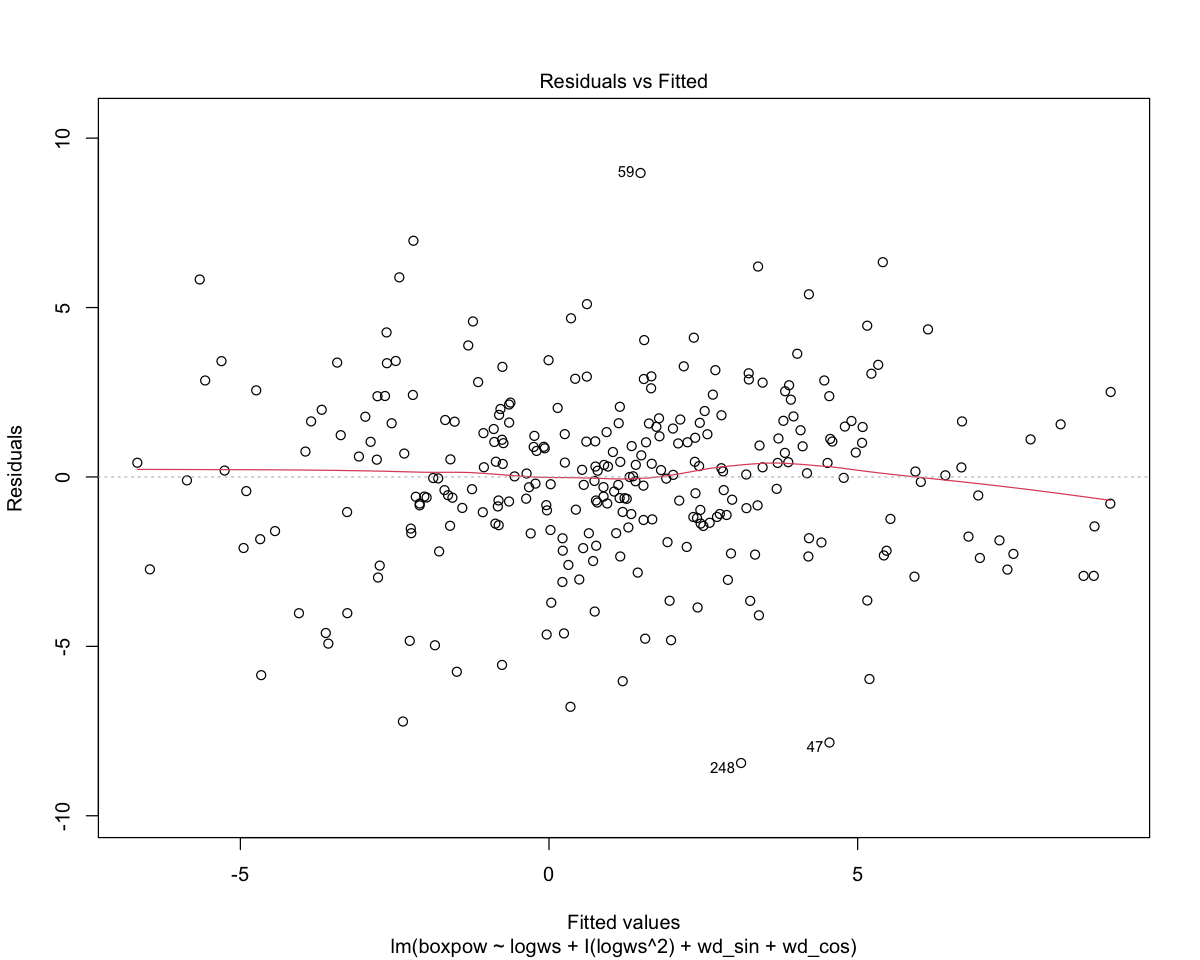

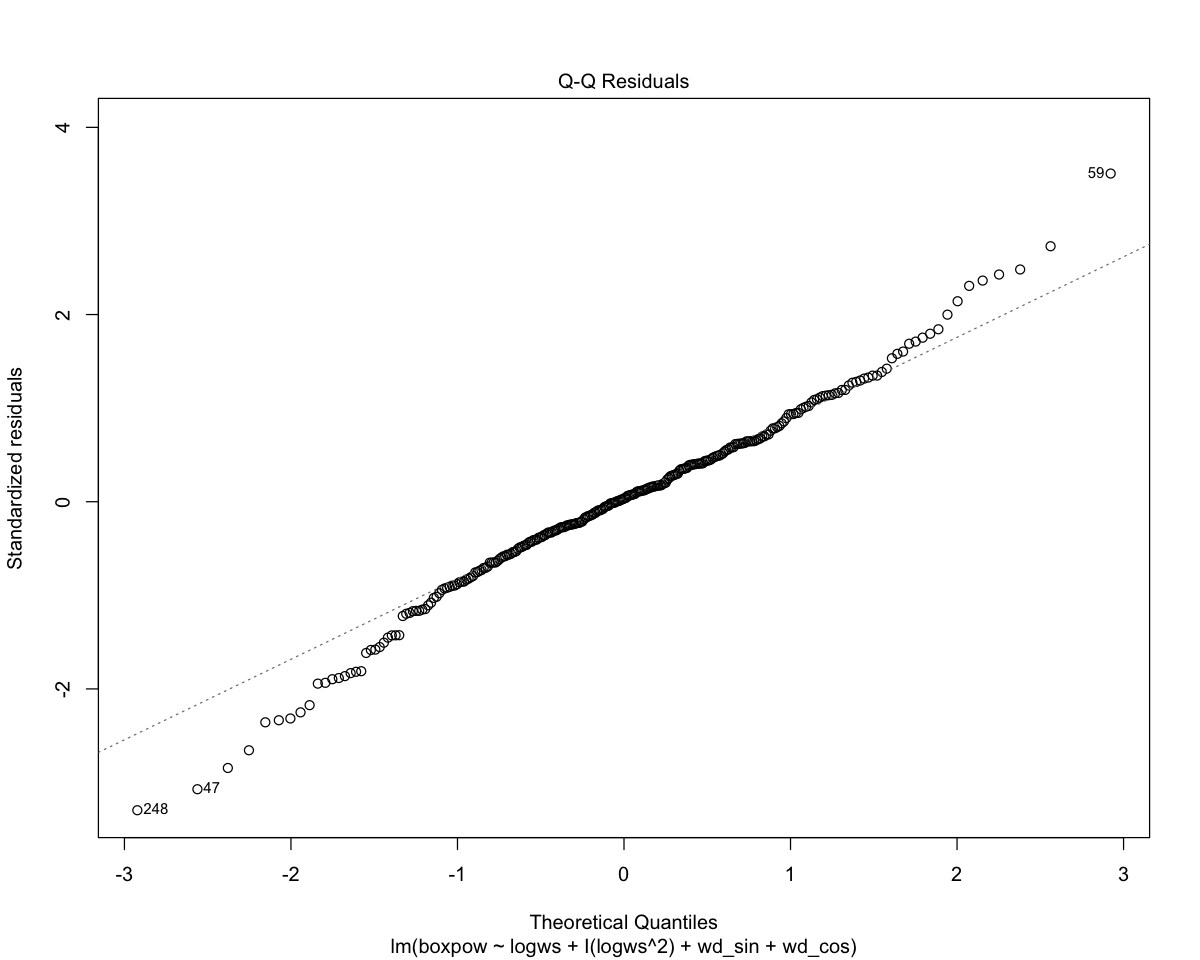

In [186]:
# Box-Cox model with wind direction
Box_cox_model_wd <- lm(boxpow ~ logws + I(logws^2) + wd_sin + wd_cos)
plot_model(Box_cox_model_wd)


Call:
glm(formula = pow.obs ~ ws30 + I(ws30^2), family = Gamma)

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16.110408   1.248912  12.900  < 2e-16 ***
ws30        -1.660988   0.174815  -9.501  < 2e-16 ***
I(ws30^2)    0.045300   0.005953   7.610 4.03e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.7071992)

    Null deviance: 503.32  on 287  degrees of freedom
Residual deviance: 354.24  on 285  degrees of freedom
AIC: -302.63

Number of Fisher Scoring iterations: 6



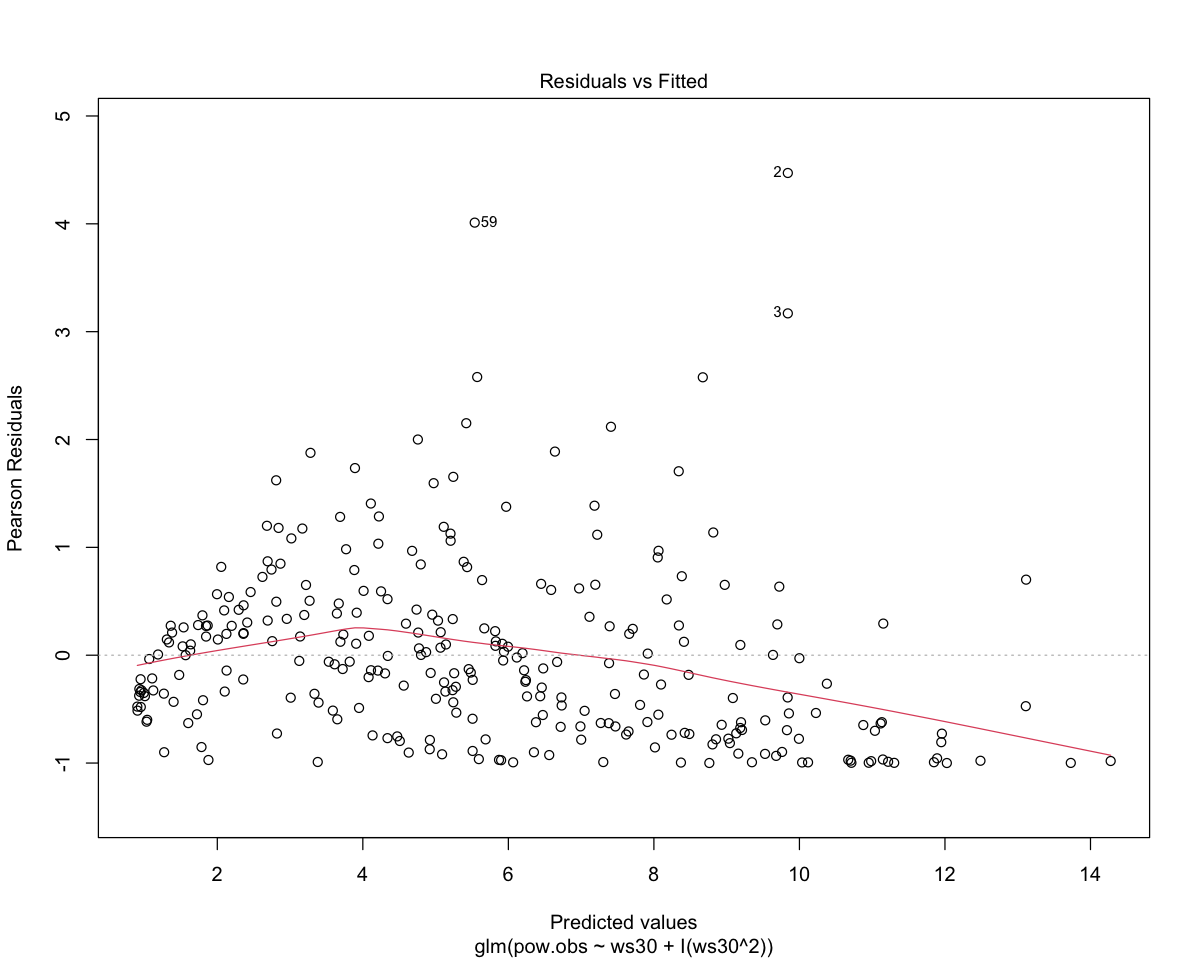

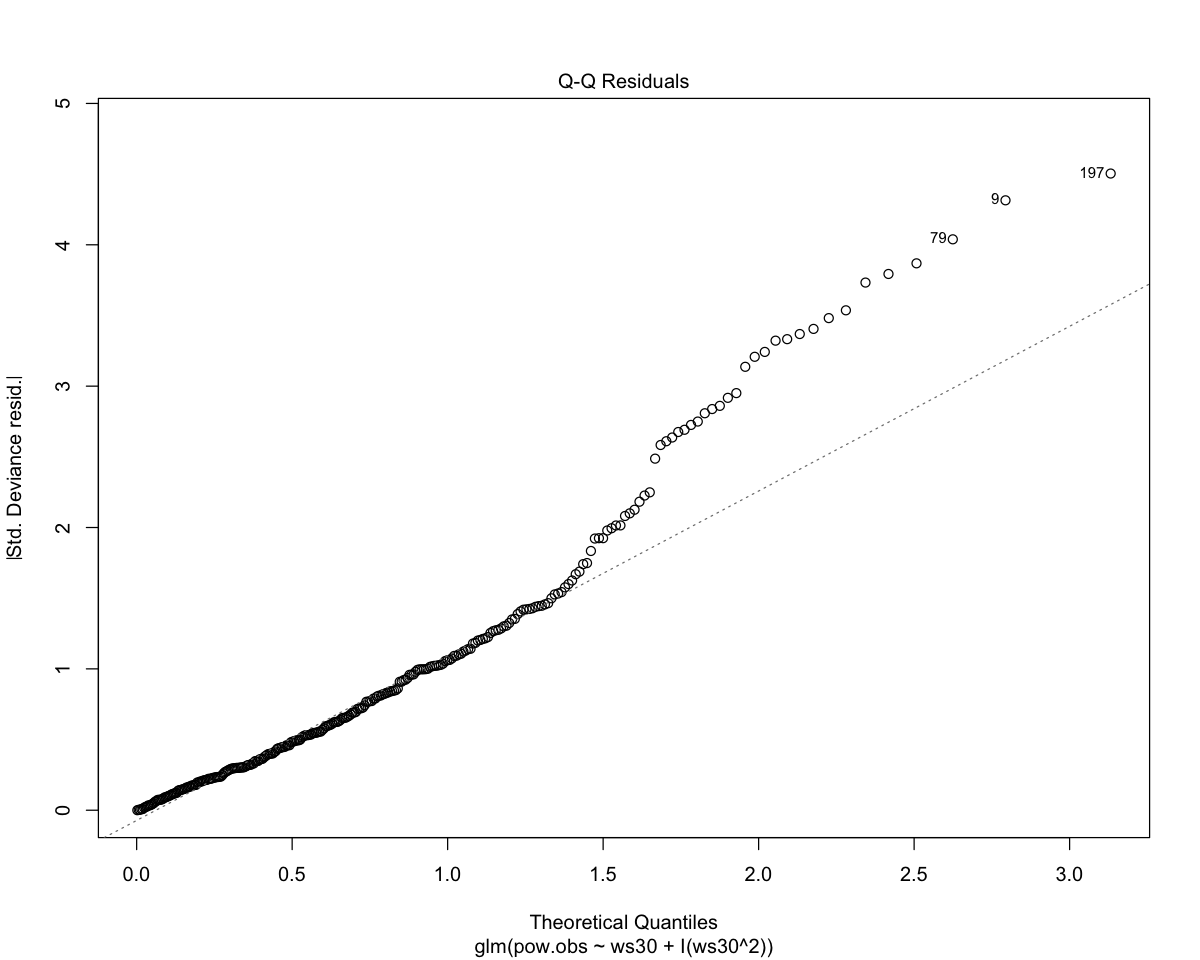

In [187]:
# Gamma Generalized Linear Model (GLM)
gamma_model <- glm(pow.obs ~ ws30 + I(ws30^2), family = Gamma)
plot_model(gamma_model)

#### Question 1.3
Present the parameters of the final model, this include quantification of the uncertainty of the parameters.


In [188]:
# Task 1.3: Present final model parameters
# Get the summary which contains the Standard Errors
summ <- summary(Box_cox_model_wd)

# Calculate the 95% Confidence Intervals
ci <- confint(Box_cox_model_wd, level = 0.95)

# Combine into a clean table
uncertainty_table <- cbind(
  Estimate = coef(Box_cox_model_wd),
  Std_Error = summ$coefficients[, "Std. Error"],
  ci
)

print("--- TABLE FOR QUESTION 1.3: PARAMETER UNCERTAINTY ---")
print(uncertainty_table)

[1] "--- TABLE FOR QUESTION 1.3: PARAMETER UNCERTAINTY ---"
                Estimate   Std_Error         2.5 %      97.5 %
(Intercept) -1115.442365 356.5790832 -1817.3261871 -413.558544
logws           1.747019   1.4859943    -1.1779851    4.672024
I(logws^2)      1.018932   0.3712884     0.2880948    1.749769
wd_sin         61.873299  20.1622002    22.1863881  101.560209
wd_cos       1107.022421 356.2994606   405.6890036 1808.355839


In [189]:
# Extract coefficients and standard errors
beta <- coef(Box_cox_model_wd)
se <- summary(Box_cox_model_wd)$coefficients[, "Std. Error"]

# Calculate Lower and Upper bounds manually
lower <- beta - 1.96 * se
upper <- beta + 1.96 * se

# Display
cbind(Estimate = beta, Lower = lower, Upper = upper)

,Estimate,Lower,Upper
(Intercept),-1115.442365,-1814.337368,-416.547362
logws,1.747019,-1.165530,4.659568
I(logws^2),1.018932,0.291207,1.746657
wd_sin,61.873299,22.355386,101.391211
wd_cos,1107.022421,408.675478,1805.369364


#### Question 1.4
Give an interpretation of the parameters in particular this should include presentation of any nonlinear functions (series expansions) of the explanatory variables.


In [190]:
# Task 1.4: Interpret parameters
lambda <- 0.326

print("--- INTERPRETATION FOR QUESTION 1.4 ---")
coeffs <- coef(Box_cox_model_wd)

# Wind Speed: Polynomial Expansion
cat("1. Wind Speed Effect (Polynomial):\n")
cat("   Linear term (logws):", round(coeffs["logws"], 4), "\n")
cat("   Quadratic term (logws^2):", round(coeffs["I(logws^2)"], 4), "\n\n")

# Wind Direction: Harmonic Series Expansion
cat("2. Wind Direction Effect (Harmonic Series):\n")
beta_sin <- coeffs["wd_sin"]
beta_cos <- coeffs["wd_cos"]
amplitude <- sqrt(beta_sin^2 + beta_cos^2)
phase_rad <- atan2(beta_sin, beta_cos)
phase_deg <- phase_rad * (180 / pi)
if(phase_deg < 0) phase_deg <- phase_deg + 360

cat("   wd_sin coefficient:", round(beta_sin, 4), "\n")
cat("   wd_cos coefficient:", round(beta_cos, 4), "\n")
cat("   Harmonic Amplitude:", round(amplitude, 4), "\n")
cat("   Optimal Direction:", round(phase_deg, 2), "degrees\n")

[1] "--- INTERPRETATION FOR QUESTION 1.4 ---"
1. Wind Speed Effect (Polynomial):
   Linear term (logws): 1.747 
   Quadratic term (logws^2): 1.0189 

2. Wind Direction Effect (Harmonic Series):
   wd_sin coefficient: 61.8733 
   wd_cos coefficient: 1107.022 
   Harmonic Amplitude: 1108.75 
   Optimal Direction: 3.2 degrees


#### Question 1.5
Present the final model, e.g. some graphical presentation of predictions under different scenarios of wind speed and wind direction.


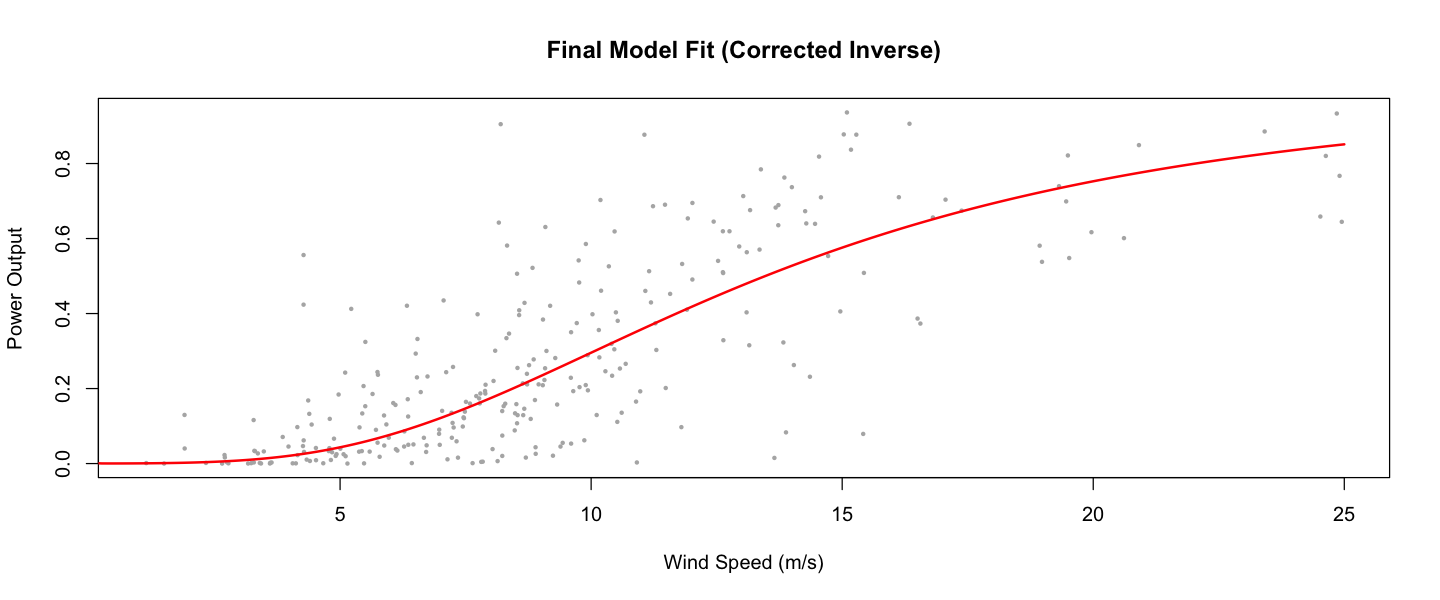

In [201]:
# 1. Setup
lambda <- 0.326 

# 2. Plot the raw data
par(bg = "white") 
plot(df_tuno$ws30, df_tuno$pow.obs, 
     pch = 16, cex = 0.5, col = "gray70",
     xlab = "Wind Speed (m/s)", 
     ylab = "Power Output", 
     main = "Final Model Fit (Corrected Inverse)")

# 3. Create prediction sequence
ws_seq <- seq(0, 25, length.out = 200)

# Create 'newdata' (using Mean Wind Direction)
# Note: As discussed, ensure you calculate the mean angle correctly or use a specific scenario
# If using the arithmetic mean of sin/cos caused issues before, use a specific direction 
# or the circular mean. For now, assuming you use the mean columns:
new_data <- data.frame(
  logws = log(ifelse(ws_seq == 0, 1e-4, ws_seq)), 
  wd_sin = mean(df_tuno$wd_sin),
  wd_cos = mean(df_tuno$wd_cos)
)

# 4. Predict and Back-Transform (Using the LOGIT-POWER Inverse)
# Step A: Get the model prediction (z)
z <- predict(Box_cox_model_wd, newdata = new_data)

# Step B: Apply the specific inverse formula for your transformation
# Formula: y = ( exp(lambda * z) / (1 + exp(lambda * z)) ) ^ (1/lambda)
y_pred <- (exp(lambda * z) / (1 + exp(lambda * z)))^(1/lambda)

# Plot the line
lines(ws_seq, y_pred, col = "red", lwd = 2)

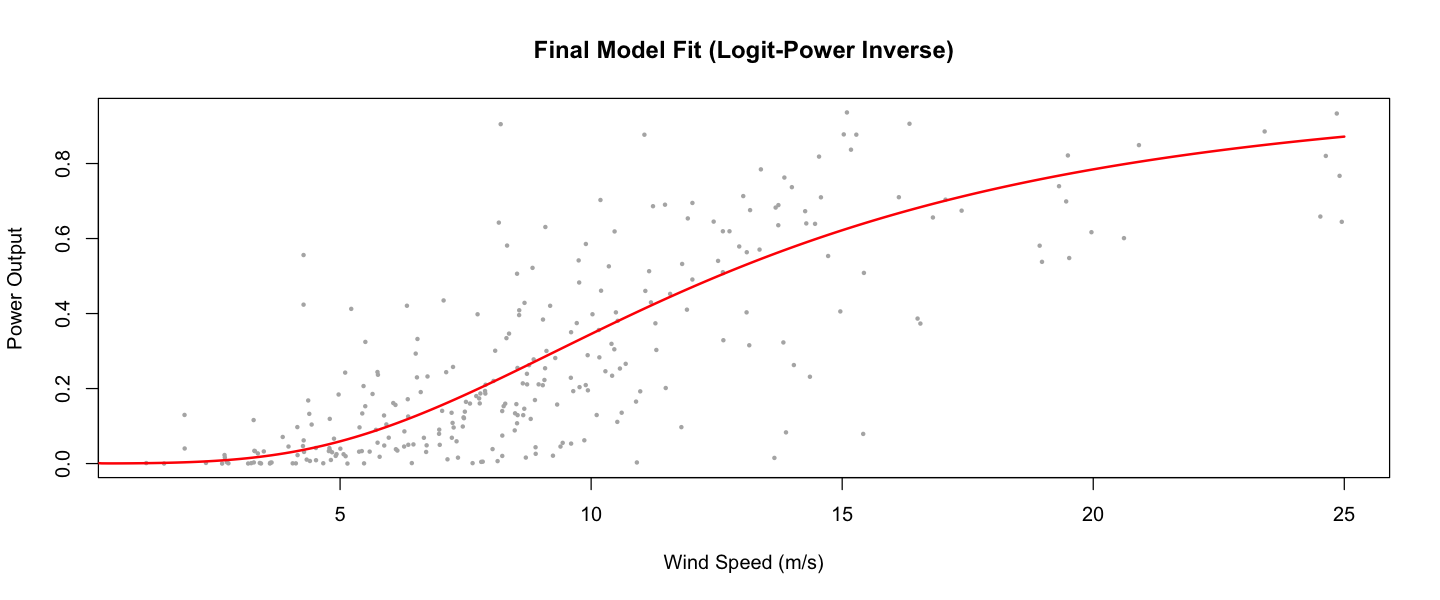

In [202]:
# 1. Setup
lambda <- 0.326 

# 2. Plot the raw data
par(bg = "white") 
plot(df_tuno$ws30, df_tuno$pow.obs, 
     pch = 16, cex = 0.5, col = "gray70",
     xlab = "Wind Speed (m/s)", 
     ylab = "Power Output", 
     main = "Final Model Fit (Logit-Power Inverse)")

# 3. Create prediction sequence
ws_seq <- seq(0, 25, length.out = 200)

# Create 'newdata'
# IMPORTANT: We calculate the angle of the mean vector to keep the geometry valid.
# (Simple mean() of sin/cos would break the coefficients)
mean_angle <- atan2(mean(df_tuno$wd_sin), mean(df_tuno$wd_cos))

new_data <- data.frame(
  logws = log(ifelse(ws_seq == 0, 1e-4, ws_seq)), 
  wd_sin = sin(mean_angle), 
  wd_cos = cos(mean_angle)
)

# 4. Predict and Back-Transform (Corrected for Logit-Power)
# Step A: Get the prediction on the transformed scale (z)
z <- predict(Box_cox_model_wd, newdata = new_data)

# Step B: Apply the inverse Logit-Power formula
# Formula: y = ( logistic(lambda * z) ) ^ (1/lambda)
y_pred <- (exp(lambda * z) / (1 + exp(lambda * z)))^(1/lambda)

# Step C: Draw the line
lines(ws_seq, y_pred, col = "red", lwd = 2)